In [78]:
import pandas as pd
import numpy as np
import re

In [79]:
final_df_imputed = pd.read_csv("60/final_df_imputed_60.csv")
df_acc_gyro = pd.read_csv("60/acc_gyro_data_60.csv")

In [80]:
# Show all columns of final_df_imputed vertically
for col in final_df_imputed.columns:
    print(col)

accelerometerX_mean
accelerometerX_median
accelerometerX_std
accelerometerX_var
accelerometerX_min
accelerometerX_max
accelerometerX_range
accelerometerX_skew
accelerometerX_kurtosis
accelerometerX_dominant_freq
accelerometerX_spectral_entropy
accelerometerX_rms_max
accelerometerX_rms_auc
accelerometerY_mean
accelerometerY_median
accelerometerY_std
accelerometerY_var
accelerometerY_min
accelerometerY_max
accelerometerY_range
accelerometerY_skew
accelerometerY_kurtosis
accelerometerY_dominant_freq
accelerometerY_spectral_entropy
accelerometerY_rms_max
accelerometerY_rms_auc
accelerometerZ_mean
accelerometerZ_median
accelerometerZ_std
accelerometerZ_var
accelerometerZ_min
accelerometerZ_max
accelerometerZ_range
accelerometerZ_skew
accelerometerZ_kurtosis
accelerometerZ_dominant_freq
accelerometerZ_spectral_entropy
accelerometerZ_rms_max
accelerometerZ_rms_auc
gyroscopeX_mean
gyroscopeX_median
gyroscopeX_std
gyroscopeX_var
gyroscopeX_min
gyroscopeX_max
gyroscopeX_range
gyroscopeX_skew
gyr

In [81]:


def filter_subjects_below_threshold(df, id_col='subject_id', threshold=100):
    """
    Keep only subjects whose numeric part of the ID is below the given threshold.
    Example:
        '13_left'  -> kept
        '11946_right' -> removed
    """
    df = df.copy()

    # Extract numeric part
    df['_numeric_id'] = df[id_col].astype(str).apply(
        lambda x: int(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else None
    )

    # Filter based on threshold
    filtered_df = df[df['_numeric_id'] < threshold].drop(columns=['_numeric_id'])

    print(f"Filtered dataset: kept {len(filtered_df)} of {len(df)} rows "
          f"({filtered_df[id_col].nunique()} unique subjects < {threshold})")

    return filtered_df


# Example usage:
final_df_imputed = filter_subjects_below_threshold(final_df_imputed)
df_acc_gyro = filter_subjects_below_threshold(df_acc_gyro)

Filtered dataset: kept 11891 of 15547 rows (26 unique subjects < 100)
Filtered dataset: kept 19891039 of 25653360 rows (26 unique subjects < 100)


In [82]:
final_df_imputed["subject_id"].unique()

array(['13_left', '13_right', '14_left', '14_right', '15_left',
       '15_right', '16_left', '16_right', '17_left', '17_right',
       '18_right', '1_left', '1_right', '20_left', '3_left', '3_right',
       '4_left', '4_right', '5_left', '5_right', '6_left', '6_right',
       '7_left', '7_right', '8_left', '8_right'], dtype=object)

In [83]:
# Group by 'subject_id' and remove the first 50 points in each group
final_df_imputed = (
    final_df_imputed.groupby('subject_id', group_keys=False)
    .apply(lambda group: group.iloc[50:] if len(group) > 50 else group)
)

In [84]:
result = (
    final_df_imputed.groupby("subject_id")["state_category"]
    .value_counts()
    .reset_index(name="count")
)

# Display the result
print(result)

   subject_id  state_category  count
0     13_left             0.0    404
1     13_left             1.0     19
2    13_right             0.0    365
3    13_right             1.0     14
4     14_left             0.0    336
5     14_left             1.0     33
6    14_right             0.0    383
7    14_right             1.0     35
8     15_left             0.0    319
9     15_left             1.0     79
10   15_right             0.0    374
11   15_right             1.0    115
12    16_left             0.0    347
13    16_left             1.0     25
14   16_right             0.0    369
15   16_right             1.0     19
16    17_left             0.0    235
17    17_left             1.0    163
18   17_right             0.0    193
19   17_right             1.0    111
20   18_right             0.0    333
21   18_right             1.0    175
22     1_left             0.0    293
23     1_left             1.0     50
24    1_right             0.0    358
25    1_right             1.0     70
2

In [85]:
final_df_imputed = final_df_imputed.groupby('subject_id').filter(lambda x: x['state_category'].nunique() > 1)

In [86]:
final_df_imputed.groupby("subject_id")["state_category"].value_counts()

subject_id  state_category
13_left     0.0               404
            1.0                19
13_right    0.0               365
            1.0                14
14_left     0.0               336
            1.0                33
14_right    0.0               383
            1.0                35
15_left     0.0               319
            1.0                79
15_right    0.0               374
            1.0               115
16_left     0.0               347
            1.0                25
16_right    0.0               369
            1.0                19
17_left     0.0               235
            1.0               163
17_right    0.0               193
            1.0               111
18_right    0.0               333
            1.0               175
1_left      0.0               293
            1.0                50
1_right     0.0               358
            1.0                70
20_left     0.0               251
            1.0               130
3_left      0.0      

In [87]:
final_df_imputed.groupby("subject_id")["state_category"].value_counts(normalize=True)

subject_id  state_category
13_left     0.0               0.955083
            1.0               0.044917
13_right    0.0               0.963061
            1.0               0.036939
14_left     0.0               0.910569
            1.0               0.089431
14_right    0.0               0.916268
            1.0               0.083732
15_left     0.0               0.801508
            1.0               0.198492
15_right    0.0               0.764826
            1.0               0.235174
16_left     0.0               0.932796
            1.0               0.067204
16_right    0.0               0.951031
            1.0               0.048969
17_left     0.0               0.590452
            1.0               0.409548
17_right    0.0               0.634868
            1.0               0.365132
18_right    0.0               0.655512
            1.0               0.344488
1_left      0.0               0.854227
            1.0               0.145773
1_right     0.0               0.83644

In [88]:
len(final_df_imputed["subject_id"].unique())

26

In [89]:
# Calculate missing ratio per column
missing_ratio = final_df_imputed.isna().mean().sort_values(ascending=False)

# Display as percentage (sorted from most missing to least)
print("=== Missing Value Ratio per Column ===")
for col, ratio in missing_ratio.items():
    print(f"{col:<40} {ratio*100:6.2f}%")

=== Missing Value Ratio per Column ===
accelerometerX_mean                        0.00%
HRV_MinNN                                  0.00%
HRV_HTI                                    0.00%
HRV_TINN                                   0.00%
HRV_LF                                     0.00%
HRV_HF                                     0.00%
HRV_VHF                                    0.00%
HRV_TP                                     0.00%
HRV_LFHF                                   0.00%
HRV_LFn                                    0.00%
HRV_HFn                                    0.00%
HRV_LnHF                                   0.00%
HRV_SD1                                    0.00%
HRV_SD2                                    0.00%
HRV_SD1SD2                                 0.00%
HRV_S                                      0.00%
HRV_CSI                                    0.00%
HRV_CVI                                    0.00%
HRV_CSI_Modified                           0.00%
HRV_PIP                       

In [90]:
!pip install -U "scikit-learn>=1.3,<1.6" "imbalanced-learn>=0.12,<0.13"


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\18319\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [91]:
final_df_imputed = final_df_imputed.drop(
    columns=[
        'accelerometerX_datetime',
        'accelerometerY_datetime',
        'accelerometerZ_datetime',
        'gyroscopeX_datetime',
        'gyroscopeY_datetime',
        'gyroscopeZ_datetime',
        'Obstructive_Apnea_mean',
        'state_datetime',                    
        'Central_Apnea_mean'
    ],
    errors='ignore'
)

print("Dropped all *_datetime columns successfully.")
print(f"Remaining columns: {len(final_df_imputed.columns)}")

Dropped all *_datetime columns successfully.
Remaining columns: 175


In [92]:
for i in final_df_imputed.columns:
    print(i)

accelerometerX_mean
accelerometerX_median
accelerometerX_std
accelerometerX_var
accelerometerX_min
accelerometerX_max
accelerometerX_range
accelerometerX_skew
accelerometerX_kurtosis
accelerometerX_dominant_freq
accelerometerX_spectral_entropy
accelerometerX_rms_max
accelerometerX_rms_auc
accelerometerY_mean
accelerometerY_median
accelerometerY_std
accelerometerY_var
accelerometerY_min
accelerometerY_max
accelerometerY_range
accelerometerY_skew
accelerometerY_kurtosis
accelerometerY_dominant_freq
accelerometerY_spectral_entropy
accelerometerY_rms_max
accelerometerY_rms_auc
accelerometerZ_mean
accelerometerZ_median
accelerometerZ_std
accelerometerZ_var
accelerometerZ_min
accelerometerZ_max
accelerometerZ_range
accelerometerZ_skew
accelerometerZ_kurtosis
accelerometerZ_dominant_freq
accelerometerZ_spectral_entropy
accelerometerZ_rms_max
accelerometerZ_rms_auc
gyroscopeX_mean
gyroscopeX_median
gyroscopeX_std
gyroscopeX_var
gyroscopeX_min
gyroscopeX_max
gyroscopeX_range
gyroscopeX_skew
gyr

# Logistic Regression

In [93]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    precision_recall_curve,
    classification_report,
    average_precision_score,
    confusion_matrix,
)
from sklearn.model_selection import RandomizedSearchCV, GroupKFold
from sklearn.feature_selection import RFE
from scipy.stats import uniform
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
np.random.seed(42)
warnings.filterwarnings("ignore", category=UserWarning)

# === Features and target ===
cols_to_drop = [
    'state_category', 'state_binary', 'subject_id', 'state_mean',
    "ledGreen_skew", "ledGreen_kurtosis", 'state_median_x', 'state_std_x', 'state_var_x',
    'state_min_x', 'state_max_x', 'state_range_x', 'state_dominant_freq',
    'state_rms_max', 'state_rms_auc', 'state_median_y', 'state_std_y',
    'state_var_y', 'state_min_y', 'state_max_y', 'state_range_y'
]

# Drop only the columns that exist
X = final_df_imputed.drop(columns=[c for c in cols_to_drop if c in final_df_imputed.columns])

y = final_df_imputed['state_category']
groups = final_df_imputed['subject_id'].astype(str)

# === Extract subject root (e.g., 13_left, 13_right → 13)
groups_root = groups.str.extract(r'(\d+)')[0].astype(int)

# === Standardize features per subject ===
print("Standardizing features within each subject...")
X_standardized = X.copy()
for col in X.columns:
    X_standardized[col] = X.groupby(groups)[col].transform(
        lambda x: (x - x.mean()) / x.std() if x.std() != 0 else 0
    )
print("Feature standardization complete.\n")

# === Hyperparameter grid ===
param_distributions_lr = {
    'C': uniform(0.001, 10.0),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'fit_intercept': [True, False],
    'max_iter': [500, 1000, 2000],
    'tol': uniform(1e-5, 1e-2)
}

# === Metrics storage ===
roc_auc_scores = []
auprc_scores = []
precision_class_0_scores = []
precision_class_1_scores = []
recall_class_0_scores = []
recall_class_1_scores = []
f1_class_0_scores = []
f1_class_1_scores = []
weighted_f1_scores = []  

# === NEW: per-leg tracking structures ===
optimal_thresholds = {'left': [], 'right': []}
probas_by_subject = {'left': {}, 'right': {}}
subjects_left_out = {'left': [], 'right': []}
all_y_test = {'left': {}, 'right': {}}

# === Specificity @ sensitivity storage ===
spec_by_target = {0.6: [], 0.7: [], 0.8: [], 0.85: []}

# === Function: specificity at fixed sensitivities ===
def specificity_at_fixed_sensitivity(y_true, y_score, target_sensitivities=[0.6, 0.7, 0.8, 0.85]):
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    results = {}
    for sens_target in target_sensitivities:
        idx = np.argmin(np.abs(recall - sens_target))
        if idx >= len(thresholds):
            idx = len(thresholds) - 1
        threshold = thresholds[idx]
        preds = (y_score >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        results[sens_target] = (specificity, sensitivity, threshold)
    return results

# === LOSO using subject roots ===
all_subjects = sorted(groups_root.unique())

for i, left_out_subject in enumerate(all_subjects):
    print(f"=== LOSO Iteration {i+1}/{len(all_subjects)} - Left out (root): {left_out_subject} ===")

    test_idx = groups_root[groups_root == left_out_subject].index
    train_idx = groups_root[groups_root != left_out_subject].index

    X_test = X_standardized.loc[test_idx]
    y_test = y.loc[test_idx]
    X_train_full = X_standardized.loc[train_idx]
    y_train_full = y.loc[train_idx]
    group_train = groups.loc[train_idx]

    # === Resample training data ===
    tomek = TomekLinks()
    X_tomek, y_tomek = tomek.fit_resample(X_train_full, y_train_full)
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X_tomek, y_tomek)
    group_resampled = group_train.iloc[undersampler.sample_indices_].reset_index(drop=True)

    # === Feature selection ===
    rfe = RFE(LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000), n_features_to_select=30)
    X_resampled_selected = rfe.fit_transform(X_resampled, y_resampled)
    selected_features = X_train_full.columns[rfe.support_]
    X_test_selected = X_test[selected_features]
    X_train_raw_selected = X_train_full[selected_features]

    # === Inner CV ===
    n_splits = min(4, len(np.unique(group_resampled)))
    group_kfold = GroupKFold(n_splits=n_splits)

    random_search = RandomizedSearchCV(
        LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000),
        param_distributions=param_distributions_lr,
        n_iter=50,
        cv=group_kfold.split(X_resampled_selected, y_resampled, groups=group_resampled),
        scoring='f1',
        verbose=0,
        n_jobs=-1
    )
    random_search.fit(X_resampled_selected, y_resampled)
    best_model = random_search.best_estimator_

    # === Threshold selection ===
    train_probs = best_model.predict_proba(X_train_raw_selected)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_train_full, train_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_threshold = thresholds[np.argmax(f1_scores)]

    # === Train performance ===
    y_train_pred = (train_probs >= best_threshold).astype(int)
    train_report = classification_report(y_train_full, y_train_pred, output_dict=True, zero_division=0)
    train_roc_auc = roc_auc_score(y_train_full, train_probs)

    train_label_0 = "0" if "0" in train_report else "0.0"
    train_label_1 = "1" if "1" in train_report else "1.0"

    f1_class_1_train = train_report.get(train_label_1, {}).get("f1-score", 0.0)
    precision_class_0_train = train_report.get(train_label_0, {}).get("precision", 0.0)
    recall_class_0_train = train_report.get(train_label_0, {}).get("recall", 0.0)
    precision_class_1_train = train_report.get(train_label_1, {}).get("precision", 0.0)
    recall_class_1_train = train_report.get(train_label_1, {}).get("recall", 0.0)

    print(f"\nTrain Performance (Subject {left_out_subject}):")
    print(f"  Threshold: {best_threshold:.4f}, ROC-AUC: {train_roc_auc:.4f}, F1 (Class 1): {f1_class_1_train:.4f}")
    print(
        f"  Precision (Class 0): {precision_class_0_train:.4f}, Recall (Class 0): {recall_class_0_train:.4f}\n"
        f"  Precision (Class 1): {precision_class_1_train:.4f}, Recall (Class 1): {recall_class_1_train:.4f}"
    )

    # === Test prediction ===
    y_test_proba = best_model.predict_proba(X_test_selected)[:, 1]
    y_test_pred = (y_test_proba >= best_threshold).astype(int)

    # === ±2 smoothing ===
    adjusted_preds = y_test_pred.copy()
    for idx in range(len(y_test)):
        if y_test.iloc[idx] == 1:
            for offset in [0]:
                check_idx = idx + offset
                if 0 <= check_idx < len(y_test_pred) and y_test_pred[check_idx] == 1:
                    adjusted_preds[idx] = 1
                    break

    # === Split by leg ===
    y_test_subjects = groups.loc[test_idx].values
    pred_df = pd.DataFrame({
        "subject_id": y_test_subjects,
        "true_label": y_test.values,
        "pred_proba": y_test_proba,
        "pred_label": adjusted_preds
    })
    legs = {
        "left": pred_df[pred_df["subject_id"].str.contains("left", case=False)],
        "right": pred_df[pred_df["subject_id"].str.contains("right", case=False)]
    }

    # === Evaluate both legs ===
    for leg_label, df_leg in legs.items():
        if len(df_leg) == 0 or df_leg["true_label"].nunique() < 2:
            print(f"No valid data for {leg_label} leg (subject {left_out_subject}).")
            continue

        roc_auc = roc_auc_score(df_leg["true_label"], df_leg["pred_proba"])
        auprc = average_precision_score(df_leg["true_label"], df_leg["pred_proba"])
        rep = classification_report(df_leg["true_label"], df_leg["pred_label"], output_dict=True, zero_division=0)
        label_0 = "0" if "0" in rep else "0.0"
        label_1 = "1" if "1" in rep else "1.0"

        f1_class_0 = rep.get(label_0, {}).get("f1-score", 0.0)
        f1_class_1 = rep.get(label_1, {}).get("f1-score", 0.0)
        weighted_f1 = rep.get("weighted avg", {}).get("f1-score", 0.0)
        precision_class_0 = rep.get(label_0, {}).get("precision", 0.0)
        recall_class_0 = rep.get(label_0, {}).get("recall", 0.0)
        precision_class_1 = rep.get(label_1, {}).get("precision", 0.0)
        recall_class_1 = rep.get(label_1, {}).get("recall", 0.0)

        print(f"\n{leg_label.capitalize()} Leg Performance (Subject {left_out_subject}):")
        print(f"  Threshold: {best_threshold:.4f}, ROC-AUC: {roc_auc:.4f}, "
              f"AUPRC: {auprc:.4f}, F1 (Class 1): {f1_class_1:.4f}")
        print(
            f"  Precision (Class 0): {precision_class_0:.4f}, Recall (Class 0): {recall_class_0:.4f}\n"
            f"  Precision (Class 1): {precision_class_1:.4f}, Recall (Class 1): {recall_class_1:.4f}"
        )

        # === Save per-leg results ===
        probas_by_subject[leg_label][left_out_subject] = df_leg["pred_proba"].values
        subjects_left_out[leg_label].append(left_out_subject)
        optimal_thresholds[leg_label].append(best_threshold)
        all_y_test[leg_label][left_out_subject] = df_leg["true_label"].values

        # === Store metrics ===
        roc_auc_scores.append(roc_auc)
        auprc_scores.append(auprc)
        precision_class_0_scores.append(precision_class_0)
        recall_class_0_scores.append(recall_class_0)
        f1_class_0_scores.append(f1_class_0)
        precision_class_1_scores.append(precision_class_1)
        recall_class_1_scores.append(recall_class_1)
        f1_class_1_scores.append(f1_class_1)
        weighted_f1_scores.append(weighted_f1)

        # === Compute specificity @ fixed sensitivities ===
        spec_results = specificity_at_fixed_sensitivity(df_leg["true_label"], df_leg["pred_proba"])
        for sens_target, (spec, sens, thr) in spec_results.items():
            spec_by_target[sens_target].append(spec)
            print(f"  At Sensitivity={sens_target*100:.0f}% → Specificity={spec*100:.2f}%, Threshold={thr:.4f}")

# === Macro F1 computation ===
macro_f1_per_fold = [
    np.nanmean([f1_0, f1_1])
    for f1_0, f1_1 in zip(f1_class_0_scores, f1_class_1_scores)
]
overall_macro_f1_mean = np.nanmean(macro_f1_per_fold)
overall_macro_f1_std = np.nanstd(macro_f1_per_fold)

# === Weighted F1 computation ===
overall_weighted_f1_mean = np.nanmean(weighted_f1_scores)
overall_weighted_f1_std = np.nanstd(weighted_f1_scores)

# === Final Summary ===
print("\n===================== FINAL SUMMARY =====================")
print(f"Overall Macro F1: {overall_macro_f1_mean*100:.2f} ± {overall_macro_f1_std*100:.2f}")
print(f"Overall Weighted F1: {overall_weighted_f1_mean*100:.2f} ± {overall_weighted_f1_std*100:.2f}")
print(f"Average ROC-AUC: {np.nanmean(roc_auc_scores)*100:.2f} ± {np.nanstd(roc_auc_scores)*100:.2f}")
print(f"Average F1 (Class 1): {np.nanmean(f1_class_1_scores)*100:.2f} ± {np.nanstd(f1_class_1_scores)*100:.2f}")
for sens_target, specs in spec_by_target.items():
    mean_spec = np.nanmean(specs)*100
    std_spec = np.nanstd(specs)*100
    print(f"Specificity @ Sens={sens_target*100:.0f}%: {mean_spec:.2f} ± {std_spec:.2f}")
print("==========================================================")

# === After all subjects processed ===
print("\nCollected Optimal Thresholds (Left):")
print(optimal_thresholds['left'])
print("\nCollected Optimal Thresholds (Right):")
print(optimal_thresholds['right'])

print("\nSubjects (Left):")
print(subjects_left_out['left'])
print("\nSubjects (Right):")
print(subjects_left_out['right'])

print("\nCollected Subject Probabilities (Left keys):")
print(list(probas_by_subject['left'].keys()))
print("\nCollected Subject Probabilities (Right keys):")
print(list(probas_by_subject['right'].keys()))

print("\nCollected y_test (Left keys):")
print(list(all_y_test['left'].keys()))
print("\nCollected y_test (Right keys):")
print(list(all_y_test['right'].keys()))


Standardizing features within each subject...
Feature standardization complete.

=== LOSO Iteration 1/14 - Left out (root): 1 ===

Train Performance (Subject 1):
  Threshold: 0.7360, ROC-AUC: 0.8735, F1 (Class 1): 0.6210
  Precision (Class 0): 0.9369, Recall (Class 0): 0.9477
  Precision (Class 1): 0.6453, Recall (Class 1): 0.5984

Left Leg Performance (Subject 1):
  Threshold: 0.7360, ROC-AUC: 0.9541, AUPRC: 0.7582, F1 (Class 1): 0.6452
  Precision (Class 0): 0.9333, Recall (Class 0): 0.9556
  Precision (Class 1): 0.6977, Recall (Class 1): 0.6000
  At Sensitivity=60% → Specificity=95.56%, Threshold=0.7420
  At Sensitivity=70% → Specificity=93.86%, Threshold=0.6286
  At Sensitivity=80% → Specificity=93.17%, Threshold=0.5380
  At Sensitivity=85% → Specificity=92.49%, Threshold=0.4856

Right Leg Performance (Subject 1):
  Threshold: 0.7360, ROC-AUC: 0.9567, AUPRC: 0.7836, F1 (Class 1): 0.7391
  Precision (Class 0): 0.9472, Recall (Class 0): 0.9525
  Precision (Class 1): 0.7500, Recall (C

In [94]:
selected_features

Index(['accelerometerY_std', 'accelerometerY_var', 'accelerometerY_min',
       'accelerometerY_range', 'accelerometerZ_std', 'accelerometerZ_var',
       'accelerometerZ_min', 'accelerometerZ_range', 'gyroscopeY_std',
       'gyroscopeZ_var', 'gyroscopeZ_min', 'gyroscopeZ_max',
       'gyroscopeZ_range', 'gyroscopeZ_dominant_freq',
       'gyroscopeZ_spectral_entropy', 'gyroscopeZ_rms_auc',
       'tempObject_median', 'tempObject_std', 'tempObject_var',
       'tempObject_max', 'tempObject_range', 'tempAmbient_mean',
       'tempAmbient_median', 'tempAmbient_var', 'tempAmbient_range',
       'HRV_SDNN', 'HRV_CVSD', 'HRV_MinNN', 'HRV_CSI_Modified', 'HRV_SD1a'],
      dtype='object')

In [95]:
print("\nFinal Summary:")
print(f"Average Sensitivity (Recall for Class 1): {np.nanmean(recall_class_1_scores):.2f}")
print(f"Average Specificity (Recall for Class 0): {np.nanmean(recall_class_0_scores):.2f}")
print(f"Average Precision for Class 0: {np.nanmean(precision_class_0_scores):.2f}")
print(f"Average Precision for Class 1: {np.nanmean(precision_class_1_scores):.2f}")
print(f"Average F1-Score for Class 0: {np.nanmean(f1_class_0_scores):.2f}")
print(f"Average F1-Score for Class 1: {np.nanmean(f1_class_1_scores):.2f}")
print(f"Average ROC-AUC: {np.nanmean(roc_auc_scores):.4f}")
print(f"Average AUPRC: {np.nanmean(auprc_scores):.4f}")  


Final Summary:
Average Sensitivity (Recall for Class 1): 0.68
Average Specificity (Recall for Class 0): 0.93
Average Precision for Class 0: 0.93
Average Precision for Class 1: 0.55
Average F1-Score for Class 0: 0.93
Average F1-Score for Class 1: 0.56
Average ROC-AUC: 0.8935
Average AUPRC: 0.6312


# XGB Classifier

In [96]:
import warnings
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
np.random.seed(42)
warnings.filterwarnings("ignore", category=UserWarning)

# === Features and target ===
cols_to_drop = [
    'state_category', 'state_binary', 'subject_id', 'state_mean',
    "ledGreen_skew", "ledGreen_kurtosis", 'state_median_x', 'state_std_x', 'state_var_x',
    'state_min_x', 'state_max_x', 'state_range_x', 'state_dominant_freq',
    'state_rms_max', 'state_rms_auc', 'state_median_y', 'state_std_y',
    'state_var_y', 'state_min_y', 'state_max_y', 'state_range_y'
]

# Drop only the columns that exist
X = final_df_imputed.drop(columns=[c for c in cols_to_drop if c in final_df_imputed.columns])

y = final_df_imputed['state_category']
groups = final_df_imputed['subject_id'].astype(str)

# === Extract subject root (e.g., 13_left, 13_right → 13)
groups_root = groups.str.extract(r'(\d+)')[0].astype(int)

# === Standardize features per subject ===
print("Standardizing features within each subject...")
X_standardized = X.copy()
for col in X.columns:
    X_standardized[col] = X.groupby(groups)[col].transform(
        lambda x: (x - x.mean()) / x.std() if x.std() != 0 else 0
    )
print("Feature standardization complete.\n")

# === Hyperparameter space for XGBoost ===
param_distributions_xgb = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 9),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(1, 3),
    'scale_pos_weight': [1, 2, 5],
}

# === Metrics storage ===
roc_auc_scores = []
auprc_scores = []
precision_class_0_scores = []
precision_class_1_scores = []
recall_class_0_scores = []
recall_class_1_scores = []
f1_class_0_scores = []
f1_class_1_scores = []
weighted_f1_scores = []  # ✅ added

# === Per-leg tracking structures ===
optimal_thresholds = {'left': [], 'right': []}
probas_by_subject = {'left': {}, 'right': {}}   # per leg
subjects_left_out = {'left': [], 'right': []}   # per leg
all_y_test = {'left': {}, 'right': {}}          # ✅ added

# === Specificity @ sensitivity storage ===
spec_by_target = {0.6: [], 0.7: [], 0.8: [], 0.85: []}

# === Function: specificity at fixed sensitivities ===
def specificity_at_fixed_sensitivity(y_true, y_score, target_sensitivities=[0.6, 0.7, 0.8, 0.85]):
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    results = {}
    for sens_target in target_sensitivities:
        idx = np.argmin(np.abs(recall - sens_target))
        if idx >= len(thresholds):
            idx = len(thresholds) - 1
        threshold = thresholds[idx]
        preds = (y_score >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        results[sens_target] = (specificity, sensitivity, threshold)
    return results

# === LOSO using subject roots ===
all_subjects = sorted(groups_root.unique())

for i, left_out_subject in enumerate(all_subjects):
    print(f"=== LOSO Iteration {i+1}/{len(all_subjects)} - Left out (root): {left_out_subject} ===")

    test_idx = groups_root[groups_root == left_out_subject].index
    train_idx = groups_root[groups_root != left_out_subject].index

    X_test = X_standardized.loc[test_idx]
    y_test = y.loc[test_idx]
    X_train_full = X_standardized.loc[train_idx]
    y_train_full = y.loc[train_idx]
    group_train = groups.loc[train_idx]

    # === Resample training data ===
    tomek = TomekLinks()
    X_tomek, y_tomek = tomek.fit_resample(X_train_full, y_train_full)
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X_tomek, y_tomek)
    group_resampled = group_train.iloc[undersampler.sample_indices_].reset_index(drop=True)

    # === Feature selection ===
    rfe = RFE(XGBClassifier(eval_metric='logloss', random_state=42), n_features_to_select=30)
    X_resampled_selected = rfe.fit_transform(X_resampled, y_resampled)
    selected_features = X_train_full.columns[rfe.support_]
    X_test_selected = X_test[selected_features]
    X_train_raw_selected = X_train_full[selected_features]

    # === Inner CV ===
    n_splits = min(4, len(np.unique(group_resampled)))
    group_kfold = GroupKFold(n_splits=n_splits)

    random_search = RandomizedSearchCV(
        XGBClassifier(eval_metric='logloss', random_state=42),
        param_distributions=param_distributions_xgb,
        n_iter=50,
        cv=group_kfold.split(X_resampled_selected, y_resampled, groups=group_resampled),
        scoring='f1',
        random_state=42,
        verbose=0,
        n_jobs=-1
    )
    random_search.fit(X_resampled_selected, y_resampled)
    best_model = random_search.best_estimator_

    # === Threshold selection ===
    train_probs = best_model.predict_proba(X_train_raw_selected)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_train_full, train_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_threshold = thresholds[np.argmax(f1_scores)]

    # === Train performance ===
    y_train_pred = (train_probs >= best_threshold).astype(int)
    train_report = classification_report(y_train_full, y_train_pred, output_dict=True, zero_division=0)
    train_roc_auc = roc_auc_score(y_train_full, train_probs)

    train_label_0 = "0" if "0" in train_report else "0.0"
    train_label_1 = "1" if "1" in train_report else "1.0"

    f1_class_1_train = train_report.get(train_label_1, {}).get("f1-score", 0.0)
    precision_class_0_train = train_report.get(train_label_0, {}).get("precision", 0.0)
    recall_class_0_train = train_report.get(train_label_0, {}).get("recall", 0.0)
    precision_class_1_train = train_report.get(train_label_1, {}).get("precision", 0.0)
    recall_class_1_train = train_report.get(train_label_1, {}).get("recall", 0.0)

    print(f"\nTrain Performance (Subject {left_out_subject}):")
    print(f"  Threshold: {best_threshold:.4f}, ROC-AUC: {train_roc_auc:.4f}, F1 (Class 1): {f1_class_1_train:.4f}")
    print(
        f"  Precision (Class 0): {precision_class_0_train:.4f}, Recall (Class 0): {recall_class_0_train:.4f}\n"
        f"  Precision (Class 1): {precision_class_1_train:.4f}, Recall (Class 1): {recall_class_1_train:.4f}"
    )

    # === Test prediction ===
    y_test_proba = best_model.predict_proba(X_test_selected)[:, 1]
    y_test_pred = (y_test_proba >= best_threshold).astype(int)

    # === ±2 smoothing ===
    adjusted_preds = y_test_pred.copy()
    for idx in range(len(y_test)):
        if y_test.iloc[idx] == 1:
            for offset in [ 0]:
                check_idx = idx + offset
                if 0 <= check_idx < len(y_test_pred) and y_test_pred[check_idx] == 1:
                    adjusted_preds[idx] = 1
                    break

    # === Split by leg ===
    y_test_subjects = groups.loc[test_idx].values
    pred_df = pd.DataFrame({
        "subject_id": y_test_subjects,
        "true_label": y_test.values,
        "pred_proba": y_test_proba,
        "pred_label": adjusted_preds
    })
    legs = {
        "left": pred_df[pred_df["subject_id"].str.contains("left", case=False)],
        "right": pred_df[pred_df["subject_id"].str.contains("right", case=False)]
    }

    # === Evaluate both legs ===
    for leg_label, df_leg in legs.items():
        if len(df_leg) == 0 or df_leg["true_label"].nunique() < 2:
            print(f"No valid data for {leg_label} leg (subject {left_out_subject}).")
            continue

        roc_auc = roc_auc_score(df_leg["true_label"], df_leg["pred_proba"])
        auprc = average_precision_score(df_leg["true_label"], df_leg["pred_proba"])
        rep = classification_report(df_leg["true_label"], df_leg["pred_label"], output_dict=True, zero_division=0)
        label_0 = "0" if "0" in rep else "0.0"
        label_1 = "1" if "1" in rep else "1.0"

        f1_class_0 = rep.get(label_0, {}).get("f1-score", 0.0)
        f1_class_1 = rep.get(label_1, {}).get("f1-score", 0.0)
        weighted_f1 = rep.get("weighted avg", {}).get("f1-score", 0.0)  # ✅ added
        precision_class_0 = rep.get(label_0, {}).get("precision", 0.0)
        recall_class_0 = rep.get(label_0, {}).get("recall", 0.0)
        precision_class_1 = rep.get(label_1, {}).get("precision", 0.0)
        recall_class_1 = rep.get(label_1, {}).get("recall", 0.0)

        print(f"\n{leg_label.capitalize()} Leg Performance (Subject {left_out_subject}):")
        print(f"  Threshold: {best_threshold:.4f}, ROC-AUC: {roc_auc:.4f}, "
              f"AUPRC: {auprc:.4f}, F1 (Class 1): {f1_class_1:.4f}, Weighted F1: {weighted_f1:.4f}")
        print(
            f"  Precision (Class 0): {precision_class_0:.4f}, Recall (Class 0): {recall_class_0:.4f}\n"
            f"  Precision (Class 1): {precision_class_1:.4f}, Recall (Class 1): {recall_class_1:.4f}"
        )

        # === Save per-leg results ===
        probas_by_subject[leg_label][left_out_subject] = df_leg["pred_proba"].values
        subjects_left_out[leg_label].append(left_out_subject)
        optimal_thresholds[leg_label].append(best_threshold)
        all_y_test[leg_label][left_out_subject] = df_leg["true_label"].values

        # === Store metrics ===
        roc_auc_scores.append(roc_auc)
        auprc_scores.append(auprc)
        precision_class_0_scores.append(precision_class_0)
        recall_class_0_scores.append(recall_class_0)
        f1_class_0_scores.append(f1_class_0)
        precision_class_1_scores.append(precision_class_1)
        recall_class_1_scores.append(recall_class_1)
        f1_class_1_scores.append(f1_class_1)
        weighted_f1_scores.append(weighted_f1)

        # === Compute specificity @ fixed sensitivities ===
        spec_results = specificity_at_fixed_sensitivity(df_leg["true_label"], df_leg["pred_proba"])
        for sens_target, (spec, sens, thr) in spec_results.items():
            spec_by_target[sens_target].append(spec)
            print(f"  At Sensitivity={sens_target*100:.0f}% → Specificity={spec*100:.2f}%, Threshold={thr:.4f}")

# === Macro F1 computation ===
macro_f1_per_fold = [
    np.nanmean([f1_0, f1_1])
    for f1_0, f1_1 in zip(f1_class_0_scores, f1_class_1_scores)
]
overall_macro_f1_mean = np.nanmean(macro_f1_per_fold)
overall_macro_f1_std = np.nanstd(macro_f1_per_fold)

# === Weighted F1 computation ===
overall_weighted_f1_mean = np.nanmean(weighted_f1_scores)
overall_weighted_f1_std = np.nanstd(weighted_f1_scores)

# === Final Summary ===
print("\n===================== FINAL SUMMARY =====================")
print(f"Overall Macro F1: {overall_macro_f1_mean*100:.2f} ± {overall_macro_f1_std*100:.2f}")
print(f"Overall Weighted F1: {overall_weighted_f1_mean*100:.2f} ± {overall_weighted_f1_std*100:.2f}")
print(f"Average ROC-AUC: {np.nanmean(roc_auc_scores)*100:.2f} ± {np.nanstd(roc_auc_scores)*100:.2f}")
print(f"Average F1 (Class 1): {np.nanmean(f1_class_1_scores)*100:.2f} ± {np.nanstd(f1_class_1_scores)*100:.2f}")
for sens_target, specs in spec_by_target.items():
    mean_spec = np.nanmean(specs)*100
    std_spec = np.nanstd(specs)*100
    print(f"Specificity @ Sens={sens_target*100:.0f}%: {mean_spec:.2f} ± {std_spec:.2f}")
print("==========================================================")

# === After all subjects processed ===
print("\nCollected Optimal Thresholds (Left):")
print(optimal_thresholds['left'])
print("\nCollected Optimal Thresholds (Right):")
print(optimal_thresholds['right'])

print("\nSubjects (Left):")
print(subjects_left_out['left'])
print("\nSubjects (Right):")
print(subjects_left_out['right'])

print("\nCollected Subject Probabilities (Left keys):")
print(list(probas_by_subject['left'].keys()))
print("\nCollected Subject Probabilities (Right keys):")
print(list(probas_by_subject['right'].keys()))

print("\nCollected y_test (Left keys):")
print(list(all_y_test['left'].keys()))
print("\nCollected y_test (Right keys):")
print(list(all_y_test['right'].keys()))

Standardizing features within each subject...
Feature standardization complete.

=== LOSO Iteration 1/14 - Left out (root): 1 ===

Train Performance (Subject 1):
  Threshold: 0.7522, ROC-AUC: 0.9575, F1 (Class 1): 0.7416
  Precision (Class 0): 0.9639, Recall (Class 0): 0.9495
  Precision (Class 1): 0.7096, Recall (Class 1): 0.7765

Left Leg Performance (Subject 1):
  Threshold: 0.7522, ROC-AUC: 0.9535, AUPRC: 0.6952, F1 (Class 1): 0.6465, Weighted F1: 0.8975
  Precision (Class 0): 0.9388, Recall (Class 0): 0.9420
  Precision (Class 1): 0.6531, Recall (Class 1): 0.6400
  At Sensitivity=60% → Specificity=94.88%, Threshold=0.8042
  At Sensitivity=70% → Specificity=94.20%, Threshold=0.7314
  At Sensitivity=80% → Specificity=92.83%, Threshold=0.6520
  At Sensitivity=85% → Specificity=91.81%, Threshold=0.6144

Right Leg Performance (Subject 1):
  Threshold: 0.7522, ROC-AUC: 0.9440, AUPRC: 0.7342, F1 (Class 1): 0.7050, Weighted F1: 0.9039
  Precision (Class 0): 0.9415, Recall (Class 0): 0.944

In [97]:
print("\nFinal Summary:")
print(f"Average Sensitivity (Recall for Class 1): {np.nanmean(recall_class_1_scores):.2f}")
print(f"Average Specificity (Recall for Class 0): {np.nanmean(recall_class_0_scores):.2f}")
print(f"Average Precision for Class 0: {np.nanmean(precision_class_0_scores):.2f}")
print(f"Average Precision for Class 1: {np.nanmean(precision_class_1_scores):.2f}")
print(f"Average F1-Score for Class 0: {np.nanmean(f1_class_0_scores):.2f}")
print(f"Average F1-Score for Class 1: {np.nanmean(f1_class_1_scores):.2f}")
print(f"Average ROC-AUC: {np.nanmean(roc_auc_scores):.4f}")
print(f"Average AUPRC: {np.nanmean(auprc_scores):.4f}")  


Final Summary:
Average Sensitivity (Recall for Class 1): 0.66
Average Specificity (Recall for Class 0): 0.93
Average Precision for Class 0: 0.93
Average Precision for Class 1: 0.60
Average F1-Score for Class 0: 0.93
Average F1-Score for Class 1: 0.57
Average ROC-AUC: 0.9027
Average AUPRC: 0.6205


# Random Forest

In [98]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GroupKFold
np.random.seed(42)
warnings.filterwarnings("ignore", category=UserWarning)

# === Features and target ===
cols_to_drop = [
    'state_category', 'state_binary', 'subject_id', 'state_mean',
    "ledGreen_skew", "ledGreen_kurtosis", 'state_median_x', 'state_std_x', 'state_var_x',
    'state_min_x', 'state_max_x', 'state_range_x', 'state_dominant_freq',
    'state_rms_max', 'state_rms_auc', 'state_median_y', 'state_std_y',
    'state_var_y', 'state_min_y', 'state_max_y', 'state_range_y'
]

# Drop only the columns that exist
X = final_df_imputed.drop(columns=[c for c in cols_to_drop if c in final_df_imputed.columns])

y = final_df_imputed['state_category']
groups = final_df_imputed['subject_id'].astype(str)

# === Extract subject root (e.g., 13_left, 13_right → 13)
groups_root = groups.str.extract(r'(\d+)')[0].astype(int)

# === Standardize features per subject ===
print("Standardizing features within each subject...")
X_standardized = X.copy()
for col in X.columns:
    X_standardized[col] = X.groupby(groups)[col].transform(
        lambda x: (x - x.mean()) / x.std() if x.std() != 0 else 0
    )
print("Feature standardization complete.\n")

# === Hyperparameter space ===
param_distributions_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 9),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': uniform(0.3, 0.7),
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced'],
    'ccp_alpha': uniform(0.0, 0.01),
    'min_weight_fraction_leaf': uniform(0.0, 0.05),
}

# === Metrics storage ===
roc_auc_scores = []
auprc_scores = []
precision_class_0_scores = []
precision_class_1_scores = []
recall_class_0_scores = []
recall_class_1_scores = []
f1_class_0_scores = []
f1_class_1_scores = []
weighted_f1_scores = []  # ✅ added

# === Per-leg tracking structures ===
optimal_thresholds = {'left': [], 'right': []}
probas_by_subject = {'left': {}, 'right': {}}
subjects_left_out = {'left': [], 'right': []}
all_y_test = {'left': {}, 'right': {}}   # ✅ Added here

# === Specificity @ sensitivity storage ===
spec_by_target = {0.6: [], 0.7: [], 0.8: [], 0.85: []}

# === Function: specificity at fixed sensitivities ===
def specificity_at_fixed_sensitivity(y_true, y_score, target_sensitivities=[0.6, 0.7, 0.8, 0.85]):
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    results = {}
    for sens_target in target_sensitivities:
        idx = np.argmin(np.abs(recall - sens_target))
        if idx >= len(thresholds):
            idx = len(thresholds) - 1
        threshold = thresholds[idx]
        preds = (y_score >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        results[sens_target] = (specificity, sensitivity, threshold)
    return results

# === LOSO using subject roots ===
all_subjects = sorted(groups_root.unique())

for i, left_out_subject in enumerate(all_subjects):
    print(f"=== LOSO Iteration {i+1}/{len(all_subjects)} - Left out (root): {left_out_subject} ===")

    test_idx = groups_root[groups_root == left_out_subject].index
    train_idx = groups_root[groups_root != left_out_subject].index

    X_test = X_standardized.loc[test_idx]
    y_test = y.loc[test_idx]
    X_train_full = X_standardized.loc[train_idx]
    y_train_full = y.loc[train_idx]
    group_train = groups.loc[train_idx]

    # === Resample training data ===
    tomek = TomekLinks()
    X_tomek, y_tomek = tomek.fit_resample(X_train_full, y_train_full)
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X_tomek, y_tomek)
    group_resampled = group_train.iloc[undersampler.sample_indices_].reset_index(drop=True)

    # --- Feature selection ---
    rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=30)
    X_resampled_sel = rfe.fit_transform(X_resampled, y_resampled)
    selected_features = X_train_full.columns[rfe.support_]
    X_test_sel = X_test[selected_features]
    X_train_raw_sel = X_train_full[selected_features]

    # --- Inner CV ---
    n_splits = min(4, len(np.unique(group_resampled)))
    gkf = GroupKFold(n_splits=n_splits)
    search = RandomizedSearchCV(
        RandomForestClassifier(random_state=42),
        param_distributions=param_distributions_rf,
        n_iter=50,
        cv=gkf.split(X_resampled_sel, y_resampled, groups=group_resampled),
        scoring='f1',
        random_state=42,
        verbose=0,
        n_jobs=-1,
    )
    search.fit(X_resampled_sel, y_resampled)
    best_model = search.best_estimator_

    # === Threshold selection ===
    train_probs = best_model.predict_proba(X_train_raw_sel)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_train_full, train_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_threshold = thresholds[np.argmax(f1_scores)]

    # === Train performance ===
    y_train_pred = (train_probs >= best_threshold).astype(int)
    train_report = classification_report(y_train_full, y_train_pred, output_dict=True, zero_division=0)
    train_roc_auc = roc_auc_score(y_train_full, train_probs)

    train_label_0 = "0" if "0" in train_report else "0.0"
    train_label_1 = "1" if "1" in train_report else "1.0"

    f1_class_1_train = train_report.get(train_label_1, {}).get("f1-score", 0.0)
    precision_class_0_train = train_report.get(train_label_0, {}).get("precision", 0.0)
    recall_class_0_train = train_report.get(train_label_0, {}).get("recall", 0.0)
    precision_class_1_train = train_report.get(train_label_1, {}).get("precision", 0.0)
    recall_class_1_train = train_report.get(train_label_1, {}).get("recall", 0.0)

    print(f"\nTrain Performance (Subject {left_out_subject}):")
    print(f"  Threshold: {best_threshold:.4f}, ROC-AUC: {train_roc_auc:.4f}, F1 (Class 1): {f1_class_1_train:.4f}")
    print(
        f"  Precision (Class 0): {precision_class_0_train:.4f}, Recall (Class 0): {recall_class_0_train:.4f}\n"
        f"  Precision (Class 1): {precision_class_1_train:.4f}, Recall (Class 1): {recall_class_1_train:.4f}"
    )

    # === Test prediction ===
    y_test_proba = best_model.predict_proba(X_test_sel)[:, 1]
    y_test_pred = (y_test_proba >= best_threshold).astype(int)

    # === ±2 smoothing ===
    adjusted_preds = y_test_pred.copy()
    for idx in range(len(y_test)):
        if y_test.iloc[idx] == 1:
            for offset in [0]:
                check_idx = idx + offset
                if 0 <= check_idx < len(y_test_pred) and y_test_pred[check_idx] == 1:
                    adjusted_preds[idx] = 1
                    break

    # === Split by leg ===
    y_test_subjects = groups.loc[test_idx].values
    pred_df = pd.DataFrame({
        "subject_id": y_test_subjects,
        "true_label": y_test.values,
        "pred_proba": y_test_proba,
        "pred_label": adjusted_preds
    })
    legs = {
        "left": pred_df[pred_df["subject_id"].str.contains("left", case=False)],
        "right": pred_df[pred_df["subject_id"].str.contains("right", case=False)]
    }

    # === Evaluate both legs ===
    for leg_label, df_leg in legs.items():
        if len(df_leg) == 0 or df_leg["true_label"].nunique() < 2:
            print(f"No valid data for {leg_label} leg (subject {left_out_subject}).")
            continue

        roc_auc = roc_auc_score(df_leg["true_label"], df_leg["pred_proba"])
        auprc = average_precision_score(df_leg["true_label"], df_leg["pred_proba"])
        rep = classification_report(df_leg["true_label"], df_leg["pred_label"], output_dict=True, zero_division=0)
        label_0 = "0" if "0" in rep else "0.0"
        label_1 = "1" if "1" in rep else "1.0"

        f1_class_0 = rep.get(label_0, {}).get("f1-score", 0.0)
        f1_class_1 = rep.get(label_1, {}).get("f1-score", 0.0)
        weighted_f1 = rep.get("weighted avg", {}).get("f1-score", 0.0)  # ✅ added
        precision_class_0 = rep.get(label_0, {}).get("precision", 0.0)
        recall_class_0 = rep.get(label_0, {}).get("recall", 0.0)
        precision_class_1 = rep.get(label_1, {}).get("precision", 0.0)
        recall_class_1 = rep.get(label_1, {}).get("recall", 0.0)

        print(f"\n{leg_label.capitalize()} Leg Performance (Subject {left_out_subject}):")
        print(f"  Threshold: {best_threshold:.4f}, ROC-AUC: {roc_auc:.4f}, "
              f"AUPRC: {auprc:.4f}, F1 (Class 1): {f1_class_1:.4f}, Weighted F1: {weighted_f1:.4f}")
        print(
            f"  Precision (Class 0): {precision_class_0:.4f}, Recall (Class 0): {recall_class_0:.4f}\n"
            f"  Precision (Class 1): {precision_class_1:.4f}, Recall (Class 1): {recall_class_1:.4f}"
        )

        # === Save per-leg results ===
        probas_by_subject[leg_label][left_out_subject] = df_leg["pred_proba"].values
        subjects_left_out[leg_label].append(left_out_subject)
        optimal_thresholds[leg_label].append(best_threshold)
        all_y_test[leg_label][left_out_subject] = df_leg["true_label"].values

        # === Store metrics ===
        roc_auc_scores.append(roc_auc)
        auprc_scores.append(auprc)
        precision_class_0_scores.append(precision_class_0)
        recall_class_0_scores.append(recall_class_0)
        f1_class_0_scores.append(f1_class_0)
        precision_class_1_scores.append(precision_class_1)
        recall_class_1_scores.append(recall_class_1)
        f1_class_1_scores.append(f1_class_1)
        weighted_f1_scores.append(weighted_f1)

        # === Compute specificity @ fixed sensitivities ===
        spec_results = specificity_at_fixed_sensitivity(df_leg["true_label"], df_leg["pred_proba"])
        for sens_target, (spec, sens, thr) in spec_results.items():
            spec_by_target[sens_target].append(spec)
            print(f"  At Sensitivity={sens_target*100:.0f}% → Specificity={spec*100:.2f}%, Threshold={thr:.4f}")

# === Macro F1 computation ===
macro_f1_per_fold = [
    np.nanmean([f1_0, f1_1])
    for f1_0, f1_1 in zip(f1_class_0_scores, f1_class_1_scores)
]
overall_macro_f1_mean = np.nanmean(macro_f1_per_fold)
overall_macro_f1_std = np.nanstd(macro_f1_per_fold)

# === Weighted F1 computation ===
overall_weighted_f1_mean = np.nanmean(weighted_f1_scores)
overall_weighted_f1_std = np.nanstd(weighted_f1_scores)

# === Final Summary ===
print("\n===================== FINAL SUMMARY =====================")
print(f"Overall Macro F1: {overall_macro_f1_mean*100:.2f} ± {overall_macro_f1_std*100:.2f}")
print(f"Overall Weighted F1: {overall_weighted_f1_mean*100:.2f} ± {overall_weighted_f1_std*100:.2f}")
print(f"Average ROC-AUC: {np.nanmean(roc_auc_scores)*100:.2f} ± {np.nanstd(roc_auc_scores)*100:.2f}")
print(f"Average F1 (Class 1): {np.nanmean(f1_class_1_scores)*100:.2f} ± {np.nanstd(f1_class_1_scores)*100:.2f}")
for sens_target, specs in spec_by_target.items():
    mean_spec = np.nanmean(specs)*100
    std_spec = np.nanstd(specs)*100
    print(f"Specificity @ Sens={sens_target*100:.0f}%: {mean_spec:.2f} ± {std_spec:.2f}")
print("==========================================================")

# === After all subjects processed ===
print("\nCollected Optimal Thresholds (Left):")
print(optimal_thresholds['left'])
print("\nCollected Optimal Thresholds (Right):")
print(optimal_thresholds['right'])

print("\nSubjects (Left):")
print(subjects_left_out['left'])
print("\nSubjects (Right):")
print(subjects_left_out['right'])

print("\nCollected Subject Probabilities (Left keys):")
print(list(probas_by_subject['left'].keys()))
print("\nCollected Subject Probabilities (Right keys):")
print(list(probas_by_subject['right'].keys()))

print("\nCollected y_test (Left keys):")
print(list(all_y_test['left'].keys()))
print("\nCollected y_test (Right keys):")
print(list(all_y_test['right'].keys()))

Standardizing features within each subject...
Feature standardization complete.

=== LOSO Iteration 1/14 - Left out (root): 1 ===

Train Performance (Subject 1):
  Threshold: 0.7504, ROC-AUC: 0.9503, F1 (Class 1): 0.7136
  Precision (Class 0): 0.9584, Recall (Class 0): 0.9464
  Precision (Class 1): 0.6875, Recall (Class 1): 0.7416

Left Leg Performance (Subject 1):
  Threshold: 0.7504, ROC-AUC: 0.9489, AUPRC: 0.6885, F1 (Class 1): 0.5979, Weighted F1: 0.8848
  Precision (Class 0): 0.9291, Recall (Class 0): 0.9386
  Precision (Class 1): 0.6170, Recall (Class 1): 0.5800
  At Sensitivity=60% → Specificity=93.17%, Threshold=0.7181
  At Sensitivity=70% → Specificity=92.83%, Threshold=0.5738
  At Sensitivity=80% → Specificity=92.15%, Threshold=0.5095
  At Sensitivity=85% → Specificity=91.13%, Threshold=0.4428

Right Leg Performance (Subject 1):
  Threshold: 0.7504, ROC-AUC: 0.9499, AUPRC: 0.7247, F1 (Class 1): 0.7391, Weighted F1: 0.9154
  Precision (Class 0): 0.9472, Recall (Class 0): 0.952

KeyboardInterrupt: 

In [ ]:
# Final summary
print("\nFinal Summary:")
print(f"Average Recall for Class 1: {np.nanmean(recall_class_1_scores):.2f}")
print(f"Average Recall for Class 0): {np.nanmean(recall_class_0_scores):.2f}")
print(f"Average Precision for Class 0: {np.nanmean(precision_class_0_scores):.2f}")
print(f"Average Precision for Class 1: {np.nanmean(precision_class_1_scores):.2f}")
print(f"Average F1-Score for Class 0: {np.nanmean(f1_class_0_scores):.2f}")
print(f"Average F1-Score for Class 1: {np.nanmean(f1_class_1_scores):.2f}")
print(f"Average ROC-AUC (real labels): {np.nanmean(roc_auc_scores):.4f}")
print(f"Average AUPRC: {np.nanmean(auprc_scores):.4f}")  


Final Summary:
Average Recall for Class 1: 0.71
Average Recall for Class 0): 0.93
Average Precision for Class 0: 0.94
Average Precision for Class 1: 0.59
Average F1-Score for Class 0: 0.93
Average F1-Score for Class 1: 0.60
Average ROC-AUC (real labels): 0.9061
Average AUPRC: 0.6456


In [ ]:
optimal_thresholds

{'left': [0.7504298238009841,
  0.7655026787696012,
  0.7459817354755832,
  0.6728875943577735,
  0.7326588449594533,
  0.7669843935603095,
  0.6933231829611182,
  0.7394244573537146,
  0.6823876415184918,
  0.7523146299686919,
  0.610000091896848,
  0.8001469518805014,
  0.7377471275426726],
 'right': [0.7504298238009841,
  0.7655026787696012,
  0.7459817354755832,
  0.6728875943577735,
  0.7326588449594533,
  0.7669843935603095,
  0.6933231829611182,
  0.7394244573537146,
  0.6823876415184918,
  0.7523146299686919,
  0.610000091896848,
  0.8001469518805014,
  0.609130478259557]}

In [ ]:
# === Compute overall mean threshold across both legs ===
all_thresholds = optimal_thresholds['left'] + optimal_thresholds['right']

if len(all_thresholds) > 0:
    mean_threshold = np.mean(all_thresholds)
    std_threshold = np.std(all_thresholds)
    print(f"\nOverall Mean Threshold: {mean_threshold:.4f} ± {std_threshold:.4f}")
else:
    print("\nNo thresholds collected.")


Overall Mean Threshold: 0.7220 ± 0.0530


In [ ]:
# Filter rows where state_category == 1 and count unique chunks per subject
state_chunks_per_subject = (
    final_df_imputed[final_df_imputed['state_category'] == 1]
    .groupby('subject_id')
    .size()  # Count occurrences per subject
    .reset_index(name='state Chunk Count')  # Rename column for clarity
)

# Rename subject_id column for consistency
state_chunks_per_subject.rename(columns={'subject_id': 'Subject'}, inplace=True)

# Display result
print(state_chunks_per_subject)

     Subject  state Chunk Count
0    13_left                 19
1   13_right                 14
2    14_left                 33
3   14_right                 35
4    15_left                 79
5   15_right                115
6    16_left                 25
7   16_right                 19
8    17_left                163
9   17_right                111
10  18_right                175
11    1_left                 50
12   1_right                 70
13   20_left                130
14    3_left                 14
15   3_right                 17
16    4_left                 42
17   4_right                 53
18    5_left                 40
19   5_right                 58
20    6_left                 12
21   6_right                 20
22    7_left                 52
23   7_right                 58
24    8_left                 20
25   8_right                 43


In [ ]:
# === Compute predicted state chunk counts per subject (left/right separately) ===
state_counts = {}

# Combine both legs
for leg_label in ['left', 'right']:
    for subject in probas_by_subject[leg_label].keys():
        probas = np.atleast_1d(probas_by_subject[leg_label][subject])
        binary_state = (probas >= mean_threshold).astype(int)
        state_counts[f"{subject}_{leg_label}"] = np.sum(binary_state)

# Convert to DataFrame
state_chunks_df = pd.DataFrame({
    'Subject': list(state_counts.keys()),
    'state Chunk Count': list(state_counts.values())
})

# ✅ Fix sorting: extract the numeric part as Series
state_chunks_df['Subject_Num'] = state_chunks_df['Subject'].str.extract(r'(\d+)').astype(float)
state_chunks_df = state_chunks_df.sort_values(by=['Subject_Num', 'Subject']).drop(columns='Subject_Num')

print("\n=== Predicted state Chunk Counts per Subject ===")
print(state_chunks_df.to_string(index=False))


=== Predicted state Chunk Counts per Subject ===
 Subject  state Chunk Count
  1_left                 48
 1_right                 72
  3_left                 49
 3_right                130
  4_left                 32
 4_right                 41
  5_left                 61
 5_right                 65
  6_left                 17
 6_right                 40
  7_left                 68
 7_right                 75
  8_left                 17
 8_right                 45
 13_left                 88
13_right                 89
 14_left                 21
14_right                 44
 15_left                 83
15_right                107
 16_left                 33
16_right                 28
 17_left                 94
17_right                 50
18_right                120
 20_left                 90


In [ ]:
# Load the data
df = pd.read_csv("subjectwise_tst.csv")

# Extract numeric subject ID (remove leading zeros) from 'KKI_00X-' pattern
df["Subject"] = df["Filename"].str.extract(r'KKI_0*(\d+)', expand=False)
df = df.dropna(subset=["Subject"])

# Convert to format like KKI4, KKI10, etc.
df["Subject"] = df["Subject"].astype(int).apply(lambda x: f"KKI{x}")

# Clean the filename (e.g., KKI_004-right → KKI4)
df["Cleaned_Filename"] = df["Filename"].str.extract(r'KKI_0*(\d+)', expand=False)
df["Cleaned_Filename"] = df["Cleaned_Filename"].astype(int).apply(lambda x: f"KKI{x}")

# Drop duplicates by subject and reset index
df = df.drop_duplicates(subset="Subject", keep="last").reset_index(drop=True)

# Show only cleaned subject and TST columns
df_test = df[["Cleaned_Filename", "TST"]].rename(columns={"Cleaned_Filename": "Subject"})
df_test["TST"] = df_test["TST"]/60


# Display
print(df_test)

   Subject       TST
0     KKI4  8.100022
1     KKI1  6.941656
2     KKI2  8.308367
3    KKI10  1.091656
4     KKI3  8.858289
5     KKI5  6.558289
6     KKI9  1.782667
7    KKI11  3.908344
8     KKI6  7.091656
9    KKI18  7.249922
10    KKI8  7.890567
11    KKI7  9.650022
12   KKI14  7.509067
13   KKI16  6.925000
14   KKI17  4.029967
15   KKI15  6.908378
16   KKI20  5.650011
17   KKI13  8.495833


In [ ]:
# Subjects to include based on your list
included_subjects = [
    "KKI1", "KKI13", "KKI14", "KKI15", "KKI16", "KKI17",
    "KKI18", "KKI20", "KKI3", "KKI4", "KKI5", "KKI6", "KKI7", "KKI8"
]

# Filter the DataFrame
df_filtered = df_test[df_test["Subject"].isin(included_subjects)]

# Compute total and average TST
total_tst = np.mean(df_filtered["TST"])


In [ ]:
df_test

,Subject,TST
0,KKI4,8.100022
1,KKI1,6.941656
2,KKI2,8.308367
3,KKI10,1.091656
4,KKI3,8.858289
5,KKI5,6.558289
6,KKI9,1.782667
7,KKI11,3.908344
8,KKI6,7.091656
9,KKI18,7.249922


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Merge all three: predicted + true + TST
merged_results = pd.merge(
    state_chunks_df.rename(columns={'state Chunk Counts': 'Total Predicted state Events'}),
    state_chunks_per_subject.rename(columns={'state Chunk Count': 'Total True state Events'}),
    on="Subject"
)

In [ ]:
merged_results

,Subject,state Chunk Count,Total True state Events
0,1_left,48,50
1,1_right,72,70
2,3_left,49,14
3,3_right,130,17
4,4_left,32,42
5,4_right,41,53
6,5_left,61,40
7,5_right,65,58
8,6_left,17,12
9,6_right,40,20


In [ ]:
df_test

,Subject,TST
0,KKI4,8.100022
1,KKI1,6.941656
2,KKI2,8.308367
3,KKI10,1.091656
4,KKI3,8.858289
5,KKI5,6.558289
6,KKI9,1.782667
7,KKI11,3.908344
8,KKI6,7.091656
9,KKI18,7.249922


In [ ]:
# --- Step 1: Merge predicted and true state counts ---
merged_results = pd.merge(
    state_chunks_df.rename(columns={'state Chunk Count': 'Total Predicted state Events'}),
    state_chunks_per_subject.rename(columns={'state Chunk Count': 'Total True state Events'}),
    on="Subject"
)

# --- Step 2: Extract numeric subject IDs for merged_results ---
merged_results["Subject_ID"] = merged_results["Subject"].str.extract(r'(\d+)').astype(int)

# --- Step 3: Expand df_test to include both left and right for each subject ---
df_test["Subject_ID"] = df_test["Subject"].str.extract(r'(\d+)').astype(int)

# Create left/right variants
df_test_expanded = pd.concat([
    df_test.assign(Subject=df_test["Subject_ID"].astype(str) + "_left"),
    df_test.assign(Subject=df_test["Subject_ID"].astype(str) + "_right")
], ignore_index=True)

# --- Step 4: Merge using full Subject name (left/right) ---
merged_with_tst = pd.merge(
    merged_results,
    df_test_expanded[["Subject", "TST"]],
    on="Subject",
    how="inner"
)

# --- Step 5: Compute normalized arousal rates ---
merged_with_tst["Predicted state Rate (per hour)"] = (
    merged_with_tst["Total Predicted state Events"] / merged_with_tst["TST"]
)
merged_with_tst["True state Rate (per hour)"] = (
    merged_with_tst["Total True state Events"] / merged_with_tst["TST"]
)

# --- Step 6: Sort and display ---
merged_with_tst["Subject_ID"] = merged_with_tst["Subject"].str.extract(r'(\d+)').astype(int)
merged_with_tst = merged_with_tst.sort_values(by=["Subject_ID", "Subject"]).reset_index(drop=True)

print("\n=== Merged Results with TST and state Rates ===")
print(merged_with_tst[[
    "Subject", "Total Predicted state Events", "Total True state Events",
    "TST", "Predicted state Rate (per hour)", "True state Rate (per hour)"
]].to_string(index=False))



=== Merged Results with TST and state Rates ===
 Subject  Total Predicted state Events  Total True state Events      TST  Predicted state Rate (per hour)  True state Rate (per hour)
  1_left                            48                       50 6.941656                         6.914777                    7.202893
 1_right                            72                       70 6.941656                        10.372165                   10.084050
  3_left                            49                       14 8.858289                         5.531542                    1.580441
 3_right                           130                       17 8.858289                        14.675520                    1.919107
  4_left                            32                       42 8.100022                         3.950606                    5.185171
 4_right                            41                       53 8.100022                         5.061715                    6.543192
  5_left     

In [ ]:
merged_results

,Subject,Total Predicted state Events,Total True state Events,Subject_ID
0,1_left,48,50,1
1,1_right,72,70,1
2,3_left,49,14,3
3,3_right,130,17,3
4,4_left,32,42,4
5,4_right,41,53,4
6,5_left,61,40,5
7,5_right,65,58,5
8,6_left,17,12,6
9,6_right,40,20,6



OLS Summary for: state Rate Correlation
                                OLS Regression Results                                
Dep. Variable:     True state Rate (per hour)   R-squared:                       0.647
Model:                                    OLS   Adj. R-squared:                  0.632
Method:                         Least Squares   F-statistic:                     43.99
Date:                        Sat, 01 Nov 2025   Prob (F-statistic):           7.35e-07
Time:                                13:13:14   Log-Likelihood:                -81.837
No. Observations:                          26   AIC:                             167.7
Df Residuals:                              24   BIC:                             170.2
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


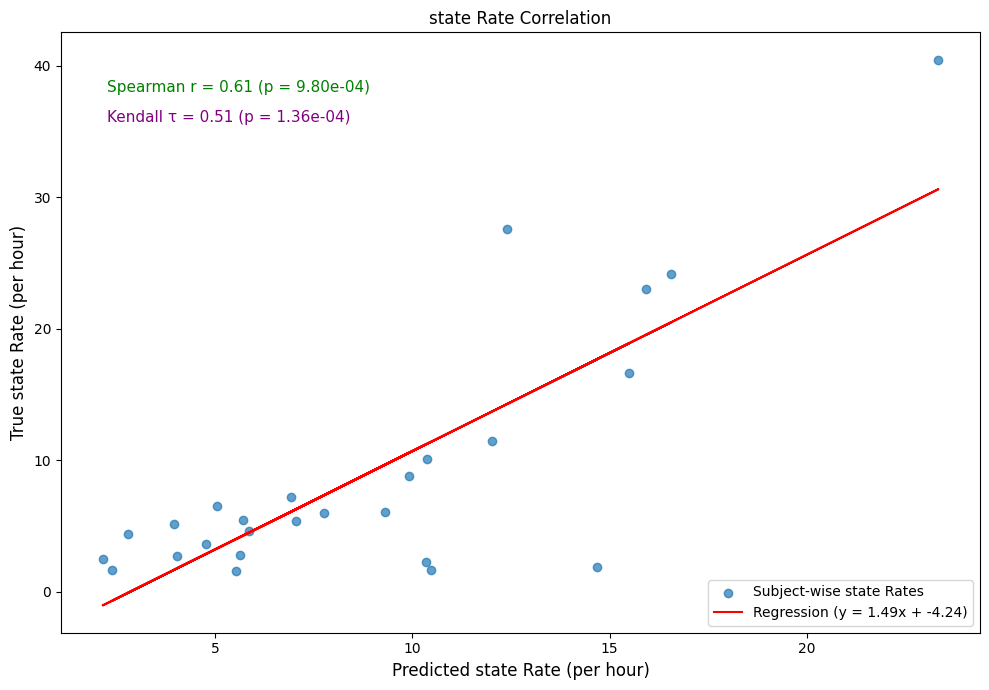

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


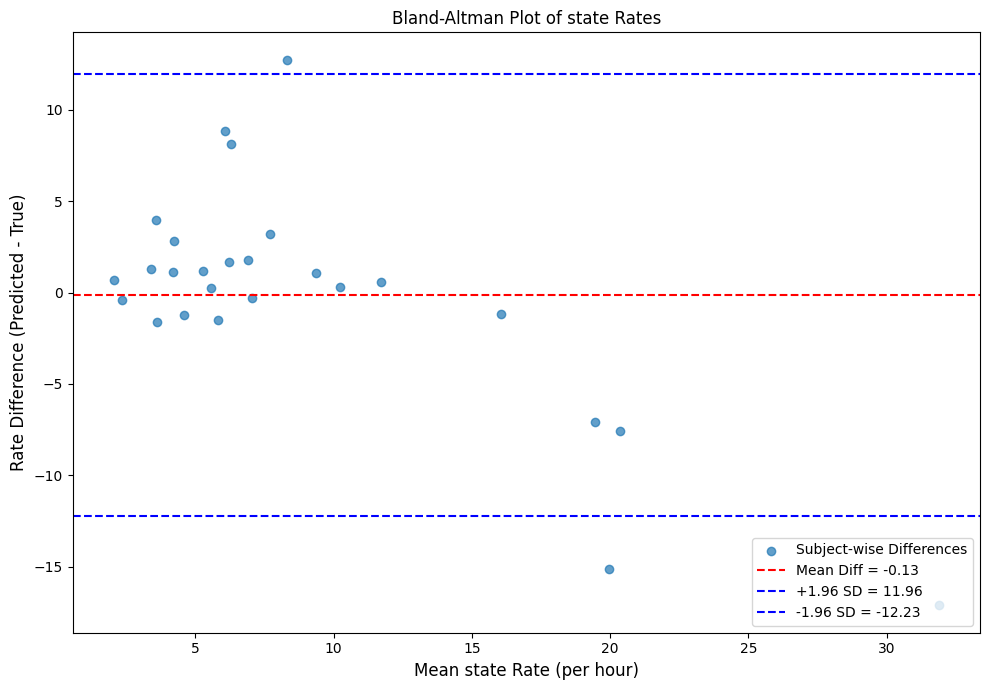

In [ ]:

# Function to calculate correlation, regression, and plot for rate-based analysis
def calculate_and_plot_rate(group, title, filename):
    x = group['Predicted state Rate (per hour)']
    y = group['True state Rate (per hour)']

    # Correlations
    spearman_corr, spearman_p = spearmanr(x, y)
    kendall_corr, kendall_p = kendalltau(x, y)

    # Linear regression
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    y_pred = model.predict(x.values.reshape(-1, 1))
    r_squared = model.score(x.values.reshape(-1, 1), y)

    # OLS summary
    X_const = sm.add_constant(x)
    ols_model = sm.OLS(y, X_const).fit()

    print(f"\nOLS Summary for: {title}")
    print(ols_model.summary())


    # Plot
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, label="Subject-wise state Rates", alpha=0.7)
    plt.plot(x, y_pred, color='red', label=f"Regression (y = {model.coef_[0]:.2f}x + {model.intercept_:.2f})")
    plt.xlabel("Predicted state Rate (per hour)", fontsize=12)
    plt.ylabel("True state Rate (per hour)", fontsize=12)
    plt.legend(loc='upper right')
    plt.annotate(f"Spearman r = {spearman_corr:.2f} (p = {spearman_p:.2e})", 
                 xy=(0.05, 0.90), xycoords='axes fraction', fontsize=11, color='green')
    plt.annotate(f"Kendall τ = {kendall_corr:.2f} (p = {kendall_p:.2e})", 
                 xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='purple')
    # plt.annotate(f"R² = {r_squared:.2f}", 
    #              xy=(0.05, 0.80), xycoords='axes fraction', fontsize=11, color='blue')
    plt.title(title)
    plt.tight_layout()
    plt.legend(loc="lower right")
    plt.savefig(f"{filename}.png", dpi=300)
    plt.savefig(f"{filename}.eps", format='eps')
    plt.show()

    return ols_model.summary()

# Function for Bland-Altman plot of rates
def bland_altman_plot_rate(x, y, title, filename):
    mean_vals = (x + y) / 2
    diff_vals = x - y
    mean_diff = np.mean(diff_vals)
    std_diff = np.std(diff_vals)

    plt.figure(figsize=(10, 7))
    plt.scatter(mean_vals, diff_vals, alpha=0.7, label="Subject-wise Differences")
    plt.axhline(mean_diff, color='red', linestyle='--', label=f"Mean Diff = {mean_diff:.2f}")
    plt.axhline(mean_diff + 1.96 * std_diff, color='blue', linestyle='--', 
                label=f"+1.96 SD = {mean_diff + 1.96 * std_diff:.2f}")
    plt.axhline(mean_diff - 1.96 * std_diff, color='blue', linestyle='--', 
                label=f"-1.96 SD = {mean_diff - 1.96 * std_diff:.2f}")
    plt.xlabel("Mean state Rate (per hour)", fontsize=12)
    plt.ylabel("Rate Difference (Predicted - True)", fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig(f"{filename}.png", dpi=300)
    plt.savefig(f"{filename}.eps", format='eps')
    plt.show()

# Run correlation plot and Bland-Altman plot on state rates
summary_stats = calculate_and_plot_rate(merged_with_tst, "state Rate Correlation", "stateRate_Correlation_ADHD")
bland_altman_plot_rate(
    merged_with_tst['Predicted state Rate (per hour)'],
    merged_with_tst['True state Rate (per hour)'],
    "Bland-Altman Plot of state Rates",
    "state-Rate_BlandAltman_ADHD"
)

In [ ]:
from sklearn.metrics import f1_score

# Define the threshold and selected subjects
threshold = mean_threshold
selected_subjects = ['1', '6', '16']
display_names = ['Subject A', 'Subject B', 'Subject C']

print("F1-Scores for Class 1:")

for i, subject_id in enumerate(selected_subjects):
    found = False  # flag to track if subject is found
    
    # Search in both legs
    for leg in ['left', 'right']:
        if int(subject_id) in all_y_test[leg]:
            y_test = np.array(all_y_test[leg][int(subject_id)])
            y_proba = np.array(probas_by_subject[leg][int(subject_id)])
            y_pred = (y_proba >= threshold).astype(int)

            f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
            print(f"{display_names[i]} ({subject_id}_{leg}): F1-Score (Class 1) = {f1:.4f}")
            found = True

    if not found:
        print(f"{display_names[i]} ({subject_id}): No data found in left/right.")


F1-Scores for Class 1:
Subject A (1_left): F1-Score (Class 1) = 0.5918
Subject A (1_right): F1-Score (Class 1) = 0.7465
Subject B (6_left): F1-Score (Class 1) = 0.7586
Subject B (6_right): F1-Score (Class 1) = 0.6000
Subject C (16_left): F1-Score (Class 1) = 0.6897
Subject C (16_right): F1-Score (Class 1) = 0.5957


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


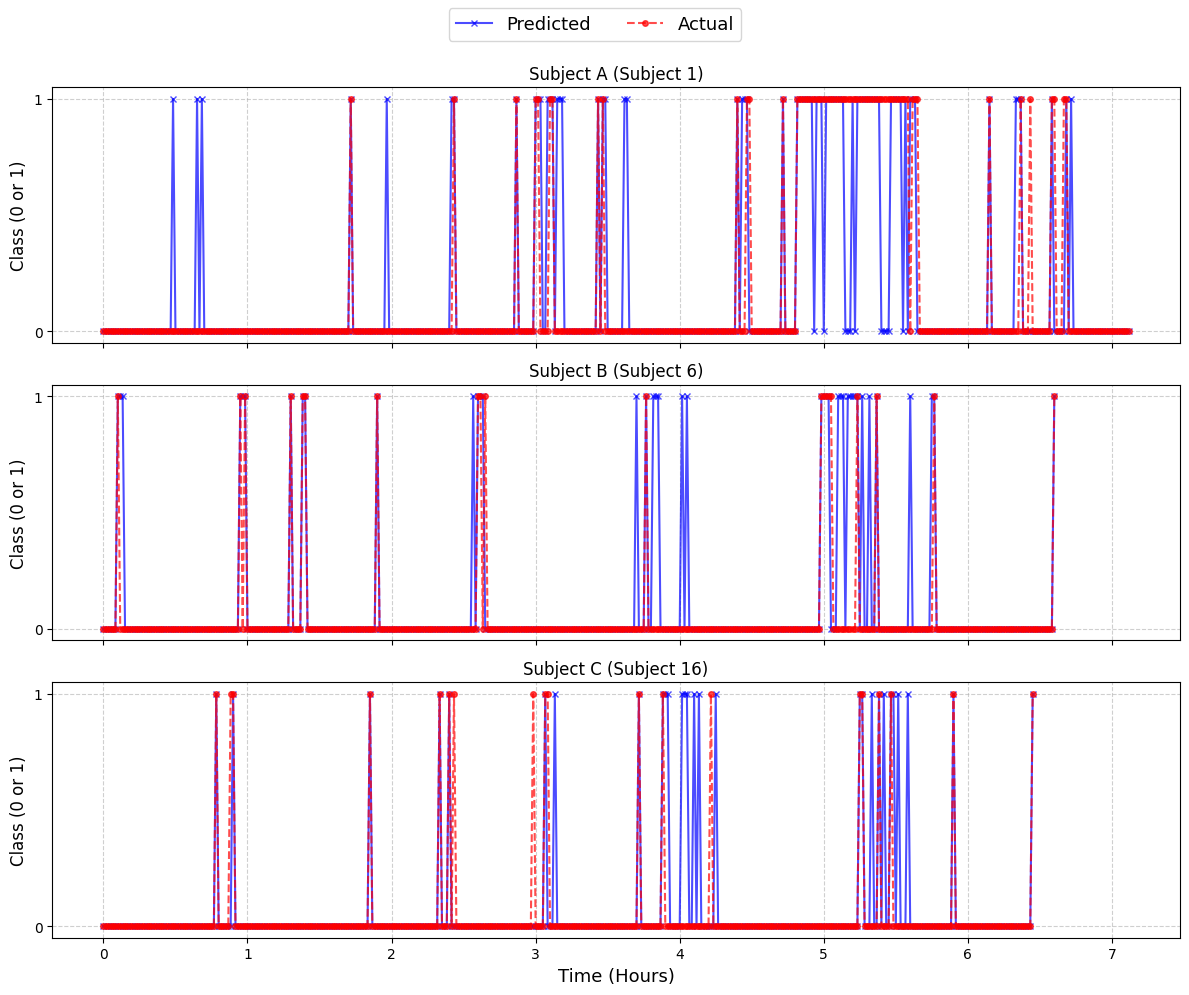

In [ ]:
# === Define the subjects and display names ===
selected_subjects = ['1', '6', '16']  # numeric part only
display_names = ['Subject A', 'Subject B', 'Subject C']

# === Define global threshold ===
threshold = mean_threshold

# === Set up the figure with 3 subplots (vertical layout) ===
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True, sharey=True)

for i, subj in enumerate(selected_subjects):
    found = False
    for leg in ['right']:
        if int(subj) in all_y_test[leg]:
            y_test = np.array(all_y_test[leg][int(subj)])
            y_proba = np.array(probas_by_subject[leg][int(subj)])
            found = True
            break
    if not found:
        print(f"⚠️ Subject {subj} not found in left/right datasets.")
        continue

    # === Safety check ===
    if len(y_test) != len(y_proba):
        raise ValueError(f"Length mismatch for subject {subj}: y_test={len(y_test)}, y_proba={len(y_proba)}")

    # === Predictions and X-axis ===
    y_pred = (y_proba >= threshold).astype(int)
    x_hours = np.arange(len(y_test)) / 60.0  # assuming 1-min step, adjust if needed

    # === Plot ===
    axs[i].plot(x_hours, y_pred, label="Predicted", marker='x', linestyle='-', markersize=4, alpha=0.7, color='b')
    axs[i].plot(x_hours, y_test, label="Actual", marker='o', linestyle='--', markersize=4, alpha=0.7, color='r')

    axs[i].set_title(display_names[i] + f" (Subject {subj})", fontsize=12)
    axs[i].set_ylabel("Class (0 or 1)", fontsize=12)
    axs[i].grid(True, linestyle='--', alpha=0.6)
    axs[i].set_yticks([0, 1])

axs[-1].set_xlabel("Time (Hours)", fontsize=13)

# === Shared legend ===
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=13)

# === Save & show ===
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("prediction_comparison_A_B_C_vertical.png", dpi=300)
plt.savefig("Figure4.eps", format='eps', dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


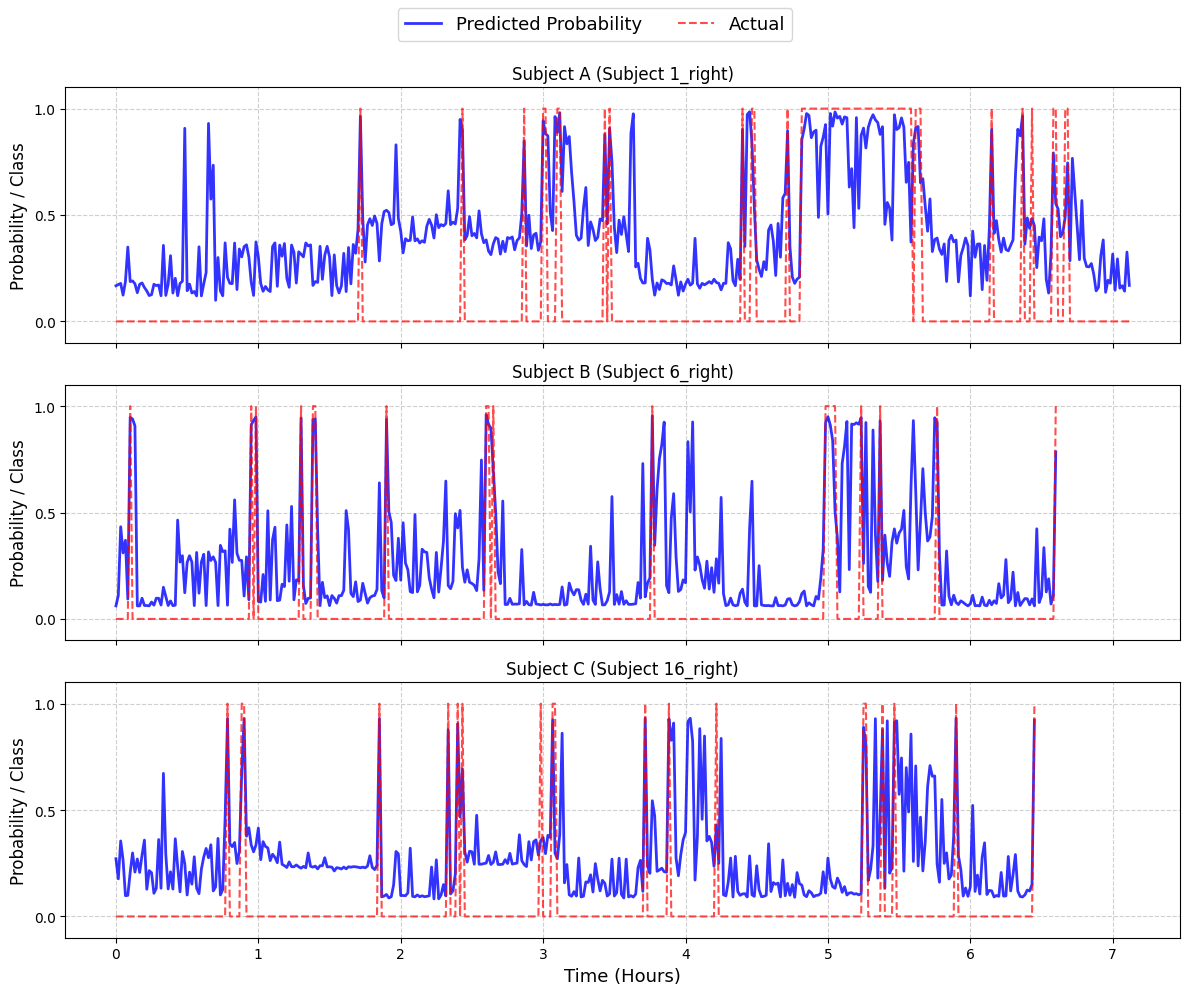

In [ ]:
# === Define subjects and display names ===
selected_subjects = ['1', '6', '16']  # numeric parts only
display_names = ['Subject A', 'Subject B', 'Subject C']

# === Create figure ===
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True, sharey=False)

for i, subj in enumerate(selected_subjects):
    found = False
    for leg in ['right']:
        if int(subj) in all_y_test[leg]:
            y_test = np.array(all_y_test[leg][int(subj)])
            y_proba = np.array(probas_by_subject[leg][int(subj)])
            found = True
            leg_label = leg
            break

    if not found:
        print(f"⚠️ Subject {subj} not found in left/right.")
        continue

    # === Sanity check ===
    if len(y_test) != len(y_proba):
        raise ValueError(f"Length mismatch for subject {subj} ({leg_label}): y_test={len(y_test)}, y_proba={len(y_proba)}")

    # === Time axis ===
    x_hours = np.arange(len(y_test)) / 60.0  # assuming 1-minute steps, adjust as needed

    # === Plot predicted probability and actual ===
    axs[i].plot(x_hours, y_proba, label="Predicted Probability", 
                linestyle='-', linewidth=2, color='b', alpha=0.8)
    axs[i].plot(x_hours, y_test, label="Actual", 
                linestyle='--', linewidth=1.5, color='r', alpha=0.7)

    axs[i].set_title(f"{display_names[i]} (Subject {subj}_{leg_label})", fontsize=12)
    axs[i].set_ylabel("Probability / Class", fontsize=12)
    axs[i].grid(True, linestyle='--', alpha=0.6)
    axs[i].set_ylim([-0.1, 1.1])
    axs[i].set_yticks([0, 0.5, 1])

axs[-1].set_xlabel("Time (Hours)", fontsize=13)

# === Shared legend ===
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=13)

# === Save and show ===
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("predicted_probability_comparison_vertical.png", dpi=300)
plt.savefig("Figure5.eps", format='eps', dpi=300)
plt.show()
